In [369]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
#Modified by Chung Jun Kim ((ID:260457455))
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [370]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [371]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [372]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [374]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [376]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

No handles with labels found to put in legend.


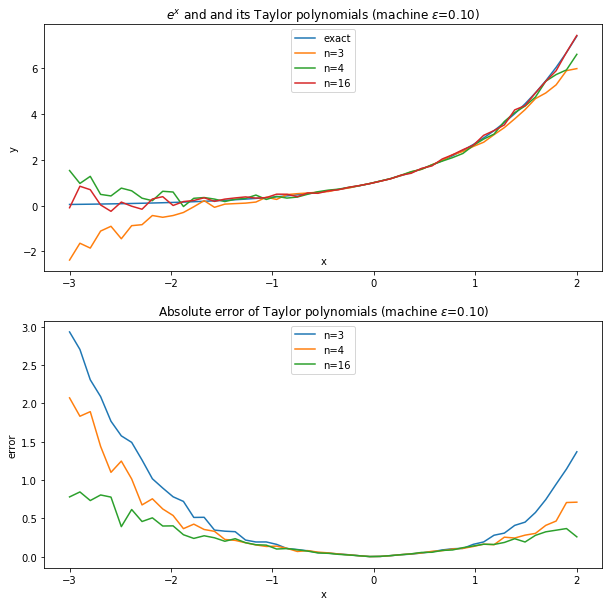

In [401]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n) #Absolute error plot

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'Absolute error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")

plt.show()

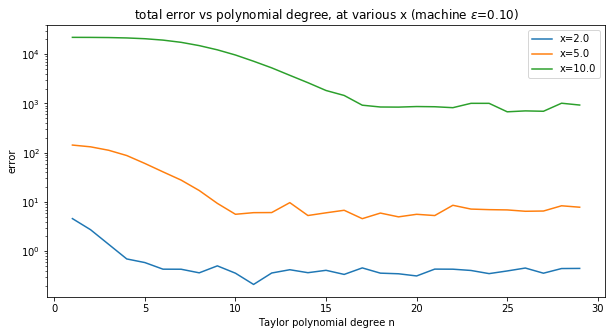

In [410]:
#Total error vs machine eps plot
xlist = [2,5,10]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

As we observe above error vs n plot, increasing the polynomial degree n does not improve the total accuracy after a certain point. 
For x=2, this point is around n=10, for x=5 it is around n=20, and for x=10, it is around n=20. After these points, the total error behave almost constant with some fluctuations. With a fixed eps, we see that this threshold is dependent on x. The larger the x, the later the threshold appears. So, the threshold is proportional to x.

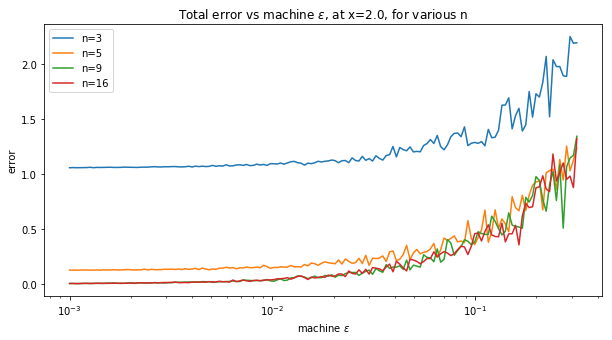

In [420]:
#Total error vs machine eps plot
nlist = [3,5,9,16]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

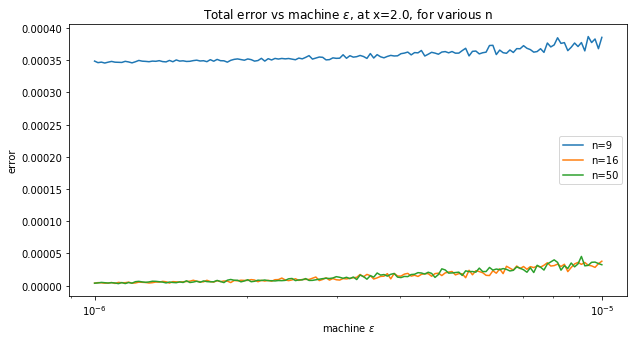

In [423]:
#Total error vs machine eps plot
nlist = [9,16,50]
elist = np.logspace(-6, -5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

From previous remark, we know that for $x=2$, the threshold appears around $n=5$ for $eps=0.1$, so the convergence of all errors with $5\leq n$ is expected. This is shown in the first plot. However, if we reduce the $eps$ to $0.01$, the error for $n = 5$ no longer converge to other errors, but errors with $9\leq n$ still seem converging at this $eps$. What would happen if we reduce $eps$ further?
We can find the answer in the second plot. If we reduce eps to $10^{-5}$, then the error for $n=9$ does not converge to other errors with $16\leq n$. So, the threshold appears later if $eps$ gets smaller. i.e. The threshold is inversly proportional to $eps$.

Thus, we can conclude that the threshold is proportional to $x$ and inversely proportional to $eps$.

# Relative Error of $e^x$

In [426]:
def relerrxlist(n,xlist,eps):
#divide difference between Tn(x) and e^x by e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x))) #e^x is divided to calculate the relative error
    return yy

No handles with labels found to put in legend.


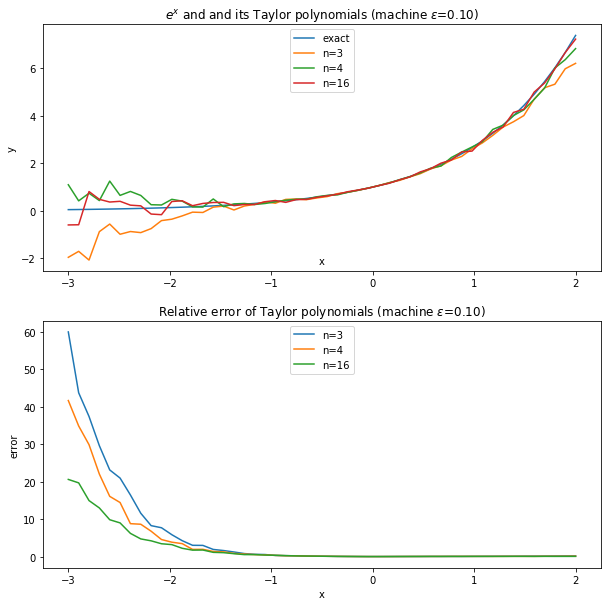

In [431]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax3 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()

for n in nlist:
    y=np.abs(relerrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(relerrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax3.plot(xlist,y,label='n=%d'%n) #Relative error plot
ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax3.set_title(r'Relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax3.set_xlabel('x')
ax3.set_ylabel('error')
ax3.legend(loc="upper center")
plt.show()

The total error plot shows a U shape, symmetric around $x=0$. However, the relative error plot shows a L shape. The shapes for $x \leq 0$ in both graph are almost identical, but there is a clear difference for $0\leq x$. This is due to the nature of exponent function. If x is negtive, then $e^x$ is $\frac{1}{e^{|x|}}$ which is a positive number smaller than 1, and the value of $e^x$ gets smaller as x decreases. However, if x is positive, then the value of $e^x$ gets exponentially larger as x increases. Since we are dividing absolute error by $e^x$ and the absolute error is almost symmetric around $x=0$, the numerator of the relative error is same for $x=c$ and $x=-c$ ($0\leq c$), where as the denominator $e^{-c}$ is very small compare to $e^c$. Thus, above asymmetric plot is resulted.

In [434]:
def relerrelist(n,x,elist):
#divide difference between Tn(x) and e^x by e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x))) #e^x is divided to calculate the relative error
    return yy

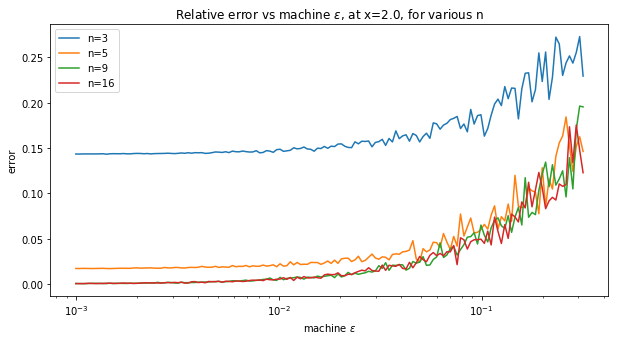

In [435]:
#Relative error vs machine eps plot
nlist = [3,5,9,16]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(relerrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(relerrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

If we compare relative error vs machine eps plot to total error plot, they almost look identical.

In [433]:
def relerrnlist(nlist,x,eps):
#divide difference between Tn(x) and e^x by e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x))) #e^x is divided to calculate the relative error
    return yy

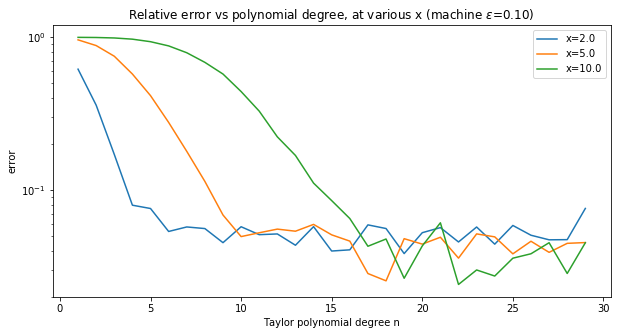

In [383]:
#Relative error vs machine eps plot
xlist = [2,5,10]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

The relative error and total error plots show similar behaviour. Both plots have thresholds for n where total accuracy does not improve after. However, the thresholds in relative error plot can be identified easily since all relative error converges at the similar value. On the other hand, each error at various x in total error plot converges to a different value.

# Transcendental function : $sin(x)$

$$
sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = x - \frac{x^3}{3!} + \ldots + (-1)^{n-1}\frac{x^{2n-1}}{(2n-1)!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{sineser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{sineserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{sineser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $sin(x)-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [455]:
def sinser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for sine function
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=x
    y=b
    for i in range(2,n+1):
        b*=float((-1)*(x**2))/((2*i-2)*(2*i-1)) 
        r1=2*eps*rn.random()-eps #from x^2
        r2=2*eps*rn.random()-eps #from (2i-1)(2i-2)
        r3=2*eps*rn.random()-eps #from the division of above two
        r=(1.+r1)*(1.+r2)*(1.+r3)-1
        y+=b*(1.+r)
    return y

In [456]:
def sinserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(sinser(n,x,eps))
    return ylist

In [457]:
def serrxlist(n,xlist,eps):
#difference between Tn(x) and sin(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

In [458]:
def serrelist(n,x,elist):
#difference between Tn(x) and sin(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

In [459]:
def serrnlist(nlist,x,eps):
#difference between Tn(x) and sin(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

No handles with labels found to put in legend.


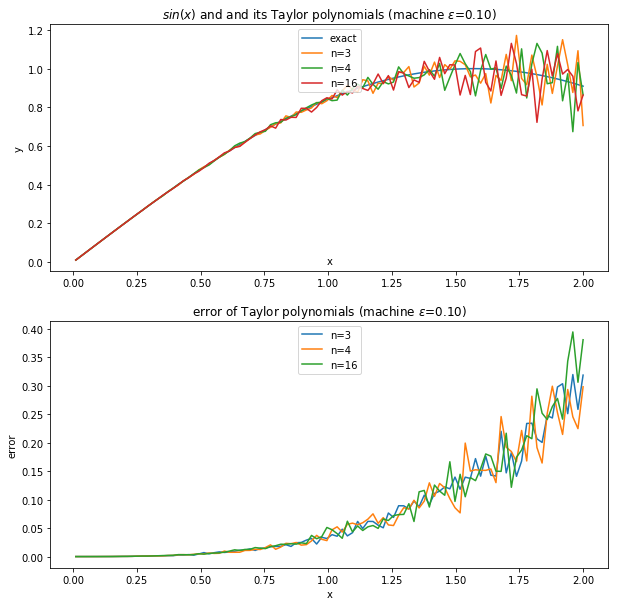

In [460]:
xlist = np.linspace(0.01, 2, 100) #0.01 was picked due to 'divided by zero'
nlist = [3,4,16]
eps=0.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(serrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(serrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)
    
ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

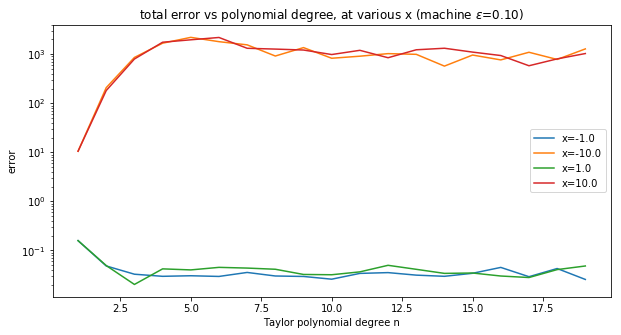

In [461]:
xlist = [-1,-10,1,10]
nlist=range(1,20)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(serrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(serrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

As we observe above error vs n plot, increasing the polynomial degree n does not improve the total accuracy after a certain point. 
For $x=1$, this point is around $n=3$, for $x=10$ it is around $n=8$. Also, negtive $x$ has same threshold as their positive counterpart. After these points, the total error behave almost constant with some fluctuations. With a fixed eps, we see that this threshold is dependent on $|x|$. The larger the $|x|$, the later the threshold appears. So, the threshold is proportional to $|x|$.

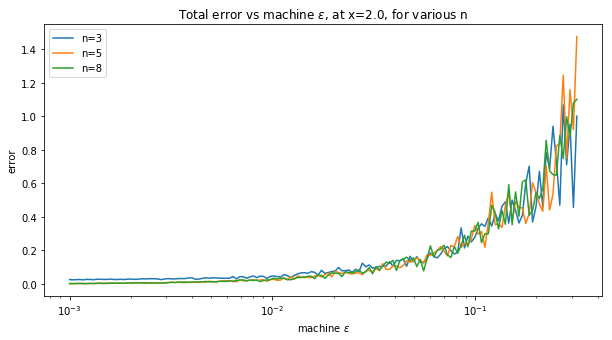

In [462]:
nlist = [3,5,8]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(serrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(serrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

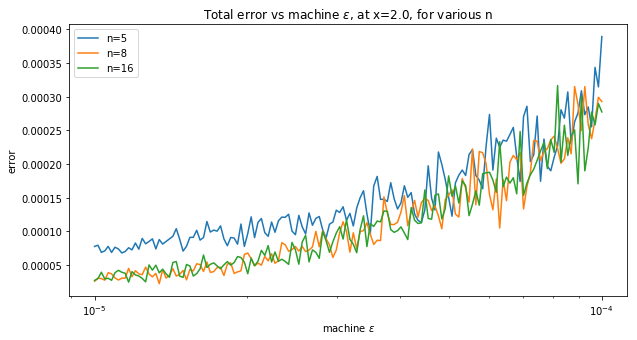

In [463]:
nlist = [5,8,16]
elist = np.logspace(-5, -4, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(serrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(serrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

From previous remark, we know that for $x=2$, the threshold appears around $n=3$ for $eps=0.1$, so the convergence of all errors with $3\leq n$ is expected. This is shown in the first plot. However, if we reduce the $eps$ to $0.01$, the error for $n = 3$ no longer converge to other errors, but errors with $5\leq n$ still seem converging at this $eps$. What would happen if we reduce $eps$ further?
We can find the answer in the second plot. If we reduce eps to $10^{-5}$, then the error for $n=5$ does not converge to other errors with $8\leq n$. So, the threshold appears later if $eps$ gets smaller. i.e. The threshold is inversly proportional to $eps$.

Thus, we can conclude that the threshold is proportional to $x$ and inversely proportional to $eps$.

#  Relative Error of $sin(x)$

In [464]:
def relserrxlist(n,xlist,eps):
#divide difference between Tn(x) and sin(x) by sin(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((expser(n,x,eps)-np.sin(x))/(np.sin(x)))
    return yy

No handles with labels found to put in legend.


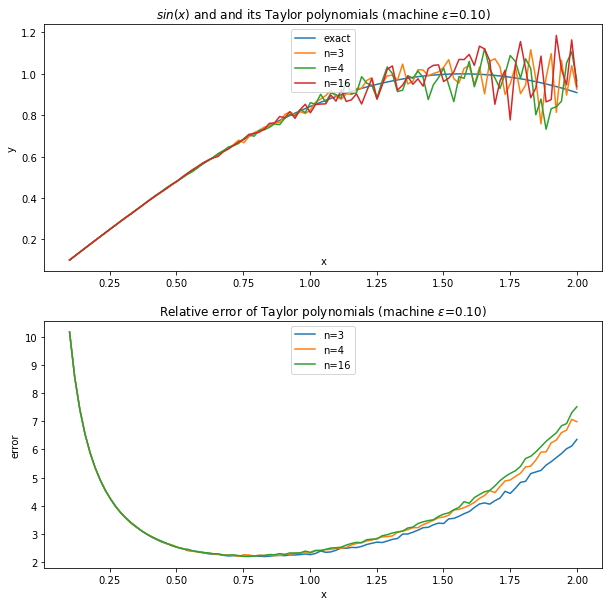

In [465]:
xlist = np.linspace(0.1, 2, 100) #0.1 was picked to avoid 'divided by zero'
nlist = [3,4,16]
eps=0.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax3 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()

for n in nlist:
    y=np.abs(relserrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(relserrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax3.plot(xlist,y,label='n=%d'%n)
    
ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax3.set_title(r'Relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax3.set_xlabel('x')
ax3.set_ylabel('error')
ax3.legend(loc="upper center")
plt.show()

For $1\leq x$, the total error plot and the relative error plot have similar behaviour. However, there is a clear difference for $x \leq 1$.

The shapes for $x \leq 1$ in relative error plot is L-like and the error goes to infinity as x approaches 0.
This happens because $sin(x)=0$ at $x=0$, and no matter how small the total error is, there will be a smaller real number making the relative error infinitly large when divided. 

Thus, above plot is resulted.

In [466]:
def relserrelist(n,x,elist):
#divide difference between Tn(x) and sin(x) by sin(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((expser(n,x,eps)-np.sin(x))/(np.sin(x)))
    return yy

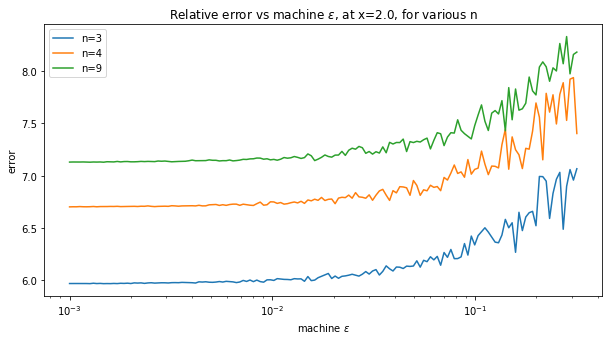

In [467]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(relserrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(relserrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

In [438]:
def relserrnlist(nlist,x,eps):
#divide difference between Tn(x) and sin(x) by sin(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((expser(n,x,eps)-np.sin(x))/(np.sin(x)))
    return yy

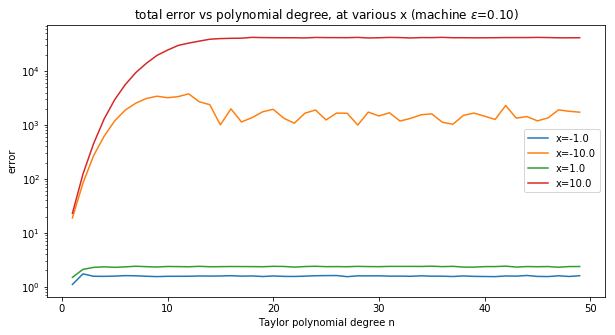

In [397]:
xlist = [-1,-10,1,10]
nlist=range(1,50)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relserrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relserrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()